In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 25 15:08:54 2018

@author: ysc
"""

#导入各种模块
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint #积分器
from moviepy.video.io.bindings import mplfig_to_npimage#动图生成
import moviepy.editor as mpy

##常用天文常数(国际单位制m,s,kg）$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
m_sun = 1.98855e30 #太阳质量
m_earth = 5.97237e24#地球质量
m_moon = 7.342e22#月球质量

AU = 149597870700#一个天文单位
S_earth_moon = 3.84399e8#月球绕地轨道半长轴
R_earth = 6.371e6 #地球平均半径

G = 6.67191e-11#万有引力常数
##初值设定$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#m1地球，m2月球
m1 = 1 * m_earth #质量
x1, y1, z1 = 0.0,0.0,0.0 #初始坐标
v1_x, v1_y, v1_z = 0.0,0.0,0.0 #初始速度

m2 = 1 * m_moon
x2, y2, z2 = 1 * S_earth_moon,0.0,0.0
v2_x, v2_y, v2_z = 0.2e3,1e3,0.0

M = m1 + m2 #总质量

##积分器$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

ta = 0 #初始时刻 
tb = 10000000 #终止时刻(s)
step = 100  #步长(s)
number = int(tb / step)

#微分方程计算$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

def int_function1(vrb, t, m1, m2, G):#变量,时间, 常数
    x1, y1, z1, x2, y2, z2, v1_x, v1_y, v1_z, v2_x, v2_y, v2_z = vrb.tolist()#变量存储于列表vrb中
    
    r = math.sqrt((x1-x2)**2+ (y1-y2)**2 + (z1-z2)**2)
    
    a1_x = - (G * m2)*(x1-x2) / (r**3)
    a1_y = - (G * m2)*(y1-y2) / (r**3)
    a1_z = - (G * m2)*(z1-z2) / (r**3)
    
    a2_x = - (G * m1)*(x2-x1) / (r**3)
    a2_y = - (G * m1)*(y2-y1) / (r**3)
    a2_z = - (G * m1)*(z2-z1) / (r**3)
    
    dv1_x_dt = a1_x
    dv1_y_dt = a1_y
    dv1_z_dt = a1_z
    dv2_x_dt = a2_x
    dv2_y_dt = a2_y
    dv2_z_dt = a2_z

    dx1_dt = v1_x
    dy1_dt = v1_y
    dz1_dt = v1_z
    dx2_dt = v2_x
    dy2_dt = v2_y
    dz2_dt = v2_z

    print("Processing...",end='\r')  #运行提示，计算中
    return dx1_dt, dy1_dt, dz1_dt, dx2_dt, dy2_dt, dz2_dt, dv1_x_dt, dv1_y_dt, dv1_z_dt, dv2_x_dt, dv2_y_dt, dv2_z_dt #返回变量增量

#参数值在代码开头设置
init_status = x1, y1, z1, x2, y2, z2, v1_x, v1_y, v1_z, v2_x, v2_y, v2_z
args = m1, m2, G#常数
t = np.arange(ta, tb, step)#初试时间,终止时间,步长
result = odeint(int_function1, init_status, t, args)

#绘图#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
x1_plot = [0 for x_ in range(number)]#创建列表以存储坐标
y1_plot = [0 for x_ in range(number)]
z1_plot = [0 for x_ in range(number)]
x2_plot = [0 for x_ in range(number)]
y2_plot = [0 for x_ in range(number)]
z2_plot = [0 for x_ in range(number)]
xc_plot = [0 for x_ in range(number)]
yc_plot = [0 for x_ in range(number)]
zc_plot = [0 for x_ in range(number)]

for i in range(0, number):
        
    xc_plot[i] = (m1 * result[i][0] + m2 * result[i][3]) / M#质心坐标
    yc_plot[i] = (m1 * result[i][1] + m2 * result[i][4]) / M
    zc_plot[i] = (m1 * result[i][2] + m2 * result[i][5]) / M 

    # #默认参考系坐标,若要用某一参考系，别忘了把其他注释掉
    # x1_plot[i] = result[i][0] 
    # y1_plot[i] = result[i][1] 
    # z1_plot[i] = result[i][2] 
    # x2_plot[i] = result[i][3] 
    # y2_plot[i] = result[i][4] 
    # z2_plot[i] = result[i][5] 

    #质心系参考系 坐标
#     x1_plot[i] = result[i][0] - xc_plot[i]
#     y1_plot[i] = result[i][1] - yc_plot[i]
#     z1_plot[i] = result[i][2] - zc_plot[i]
#     x2_plot[i] = result[i][3] - xc_plot[i]
#     y2_plot[i] = result[i][4] - yc_plot[i]
#     z2_plot[i] = result[i][5] - zc_plot[i]

    #m1参考系 坐标
    x1_plot[i] = 0
    y1_plot[i] = 0
    z1_plot[i] = 0
    x2_plot[i] = result[i][3] - result[i][0]
    y2_plot[i] = result[i][4] - result[i][1]
    z2_plot[i] = result[i][5] - result[i][2]

    # #m2参考系 坐标
    # x1_plot[i] = result[i][0] - result[i][3]
    # y1_plot[i] = result[i][1] - result[i][4]
    # z1_plot[i] = result[i][2] - result[i][5]
    # x2_plot[i] = 0
    # y2_plot[i] = 0
    # z2_plot[i] = 0
    
print("Calculation finished!")  ##运行提示，计算完成

Calculation finished!


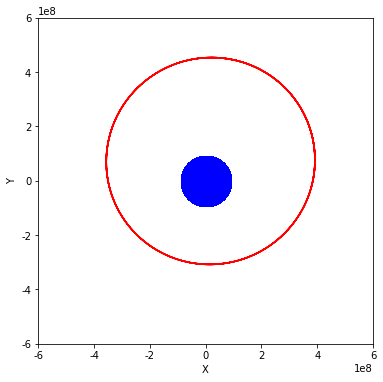

In [2]:
#二维xy绘图    
plt.figure(figsize = (6,6))#figsize代表横纵比
plt.plot(x1_plot, y1_plot, 'o', ms=50, c="blue")#ms表示绘制点线尺寸, 'o'表示绘点, c表示绘制颜色,可以为十六进制颜色码，如c = '#6BABF4'
plt.plot(x2_plot, y2_plot, c="red")
plt.ylabel('Y')#坐标轴
plt.xlabel('X')
plt.xlim(-6e8,6e8)#设置纵坐标 地月系
plt.ylim(-6e8,6e8)#设置纵坐标
plt.show()

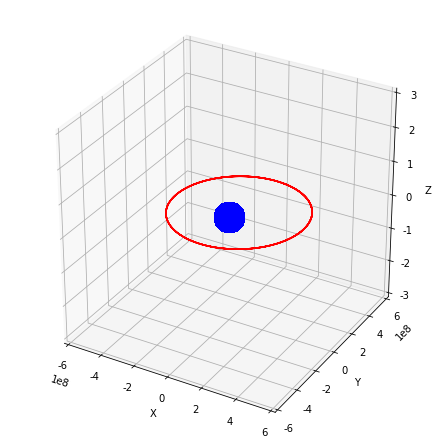

In [3]:
#三维绘图
fig = plt.figure(figsize = (6,6))
ax = Axes3D(fig)
ax.plot(x1_plot, y1_plot, z1_plot,'o', ms=30, c="blue")#ms表示绘制点线尺寸, 'o'表示绘点, c表示绘制颜色,可以为十六进制颜色码，如c = '#6BABF4'
ax.plot(x2_plot, y2_plot, z2_plot, c="red")

ax.set_xlim(-6e8,6e8)#设置x坐标范围 地月系
ax.set_ylim(-6e8,6e8)#设置y坐标范围
ax.set_zlim(-3,3)#设置z坐标范围

ax.set_zlabel('Z') #坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')

plt.show()#显示图片

100%|█████████▉| 300/301 [00:38<00:00,  6.82it/s]


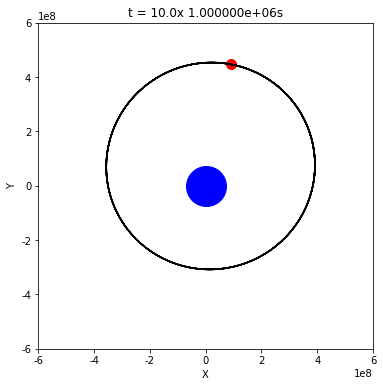

In [6]:
#绘2d动图#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 使用MATPLOTLIB画一个图
duration = 10 #总共的时间
speed = 1.0#播放速率       
fig_mpl, ax = plt.subplots(1, figsize=(6,6),facecolor='white')#figsize代表横纵比

# 使用MOVIEPY让图动起来(根据时间t来更新图). 保存为GIF等.
def make_frame_mpl(t):
    ax.clear() #清空图片
    
    ax.set_ylabel('Y') #坐标轴
    ax.set_xlabel('X')
    ax.set_xlim(-6e8,6e8)#设置纵坐标 地月系
    ax.set_ylim(-6e8,6e8)#设置纵坐标 
    
    ax.plot(x1_plot[int(number*(t/duration))], y1_plot[int(number*(t/duration))], 'o', ms=40, c ='blue') #ms表示绘制点线尺寸，c表示绘制颜色，'o'表示绘点
    ax.plot(x2_plot[int(number*(t/duration))], y2_plot[int(number*(t/duration))], 'o', ms=10, c ='red')
    ax.plot(x1_plot[0:int(number*(t/duration))], y1_plot[0:int(number*(t/duration))], ms=0.2, c ='black')
    ax.plot(x2_plot[0:int(number*(t/duration))], y2_plot[0:int(number*(t/duration))], ms=0.2, c ='black')

    ax.set_title("t = " + str(round(t,1)) + "x %e" % (tb/duration) + "s")#设置标题,round为近似函数
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration) #duration表示所制作视频正常速度播放的时间
#animation.speedx(speed).write_gif("2body2D.gif", fps=30) #输出gif, speedx表示播放速度(1.0为正常速度), fps每秒帧数
animation.speedx(speed).ipython_display(fps=30, loop=1, autoplay=1) #用于在Jupyter上输出，也可python3 本地输出mp4,speedx表示播放速度(1.0为正常速度), fps每秒帧数,loop表示是否循环播放(1或者0)，autoplay表示是否自动播放(1或者0)

100%|█████████▉| 250/251 [00:51<00:00,  3.84it/s]


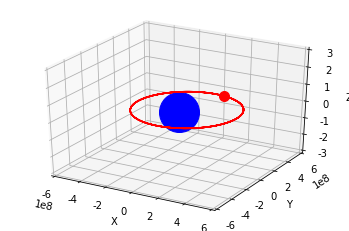

In [7]:
# #绘3d动图#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
duration = 10 #总共的时间       figsize代表横纵比
speed = 1.0#播放速率    

fig_mpl = plt.figure()
ax = fig_mpl.add_subplot(111, projection='3d')

# 使用MOVIEPY让图动起来(根据时间t来更新图). 保存为GIF.
def make_frame_mpl(t):
    ax.clear()
    ax.set_zlabel('Z') #坐标轴
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_xlim(-6e8,6e8)#设置x坐标范围 地月系
    ax.set_ylim(-6e8,6e8)#设置y坐标范围
    ax.set_zlim(-3,3)#设置z坐标范围

    line = ax.plot(x1_plot[int(number*(t/duration)):int(number*(t/duration))+1], y1_plot[int(number*(t/duration)):int(number*(t/duration))+1],z1_plot[int(number*(t/duration)):int(number*(t/duration))+1],'o',ms=40, c ='blue')
    line = ax.plot(x2_plot[int(number*(t/duration)):int(number*(t/duration))+1], y2_plot[int(number*(t/duration)):int(number*(t/duration))+1],z2_plot[int(number*(t/duration)):int(number*(t/duration))+1],'o',ms=10, c ='red')
    line = ax.plot(x1_plot[0:int(number*(t/duration))], y1_plot[0:int(number*(t/duration))],z1_plot[0:int(number*(t/duration))], ms=0.2, c ='blue')
    line = ax.plot(x2_plot[0:int(number*(t/duration))], y2_plot[0:int(number*(t/duration))],z2_plot[0:int(number*(t/duration))], ms=0.2, c ='red')
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
#animation.speedx(speed).write_gif("tests3D.gif", fps=25)
animation.speedx(speed).ipython_display(fps=25, loop=1, autoplay=0)